O intuito desse projeto é utilizar um modelo de aprendizado de maquina que consiga predizer qual o tipo de usuário que realiza o teste gratis do projeto proposto pela materia de Web. 

Criamos um formulario no Microsoft forms com 5 perguntas, sendo que a ultima pergunta era se o usuario tem interesse ou não em se inscrever no teste gratis. 

Obtemos mais de 40 respostas no formulário, após isso, convertemos as respostas para um arquivo CSV, arquivo esse que vamos utilizar para a criação do dataset e para o aprendizado de maquina.

Os Markdowns tem como função mostrar o passo a passo da solução, você pode obter mais informações do projeto no arquivo README.md


Importação das bibliotecas necessarias para a sprint

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



atribuição do arquivo csv na variavel df.

In [2]:
df = pd.read_csv('FormTesteGratis.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                                                                                                  --------------  -----
 0   ID                                                                                                                                                                                      65 non-null     int64
 1   De 0 a 5, o quanto voce sabe sobre o que e CRM?                                                                                                                                         65 non-null     int64
 2   de 0 a 5, o quanto voce conhece sobre Salesforce 

,ID,"De 0 a 5, o quanto voce sabe sobre o que e CRM?","de 0 a 5, o quanto voce conhece sobre Salesforce (Considere 0 como nao conheco e 5 como conheco muito)","Qual o tamanho da sua empresa? (Considere 1 como pequena empresa de 0 a 9 funcionarios, 2 como media empresa de 10 a 50 funcionarios e 3 como grande empresa, acima de 50 funcionarios",O Quao importante voce considera o uso de CRM para a sua empresa?,Voce consideraria realizar o teste gratis da Salesforce?
0,1,0,0,1,5,0
1,2,0,0,1,0,0
2,3,3,4,1,5,1
3,4,0,0,1,0,0
4,5,3,3,3,4,1


Tratamento da variavel df, remoção de dados que não são uteis


In [3]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                                                                                                  --------------  -----
 0   ID                                                                                                                                                                                      65 non-null     int64
 1   De 0 a 5, o quanto voce sabe sobre o que e CRM?                                                                                                                                         65 non-null     int64
 2   de 0 a 5, o quanto voce conhece sobre Salesforce 

Grafico de pares para identificar relações visuais entre os dados.

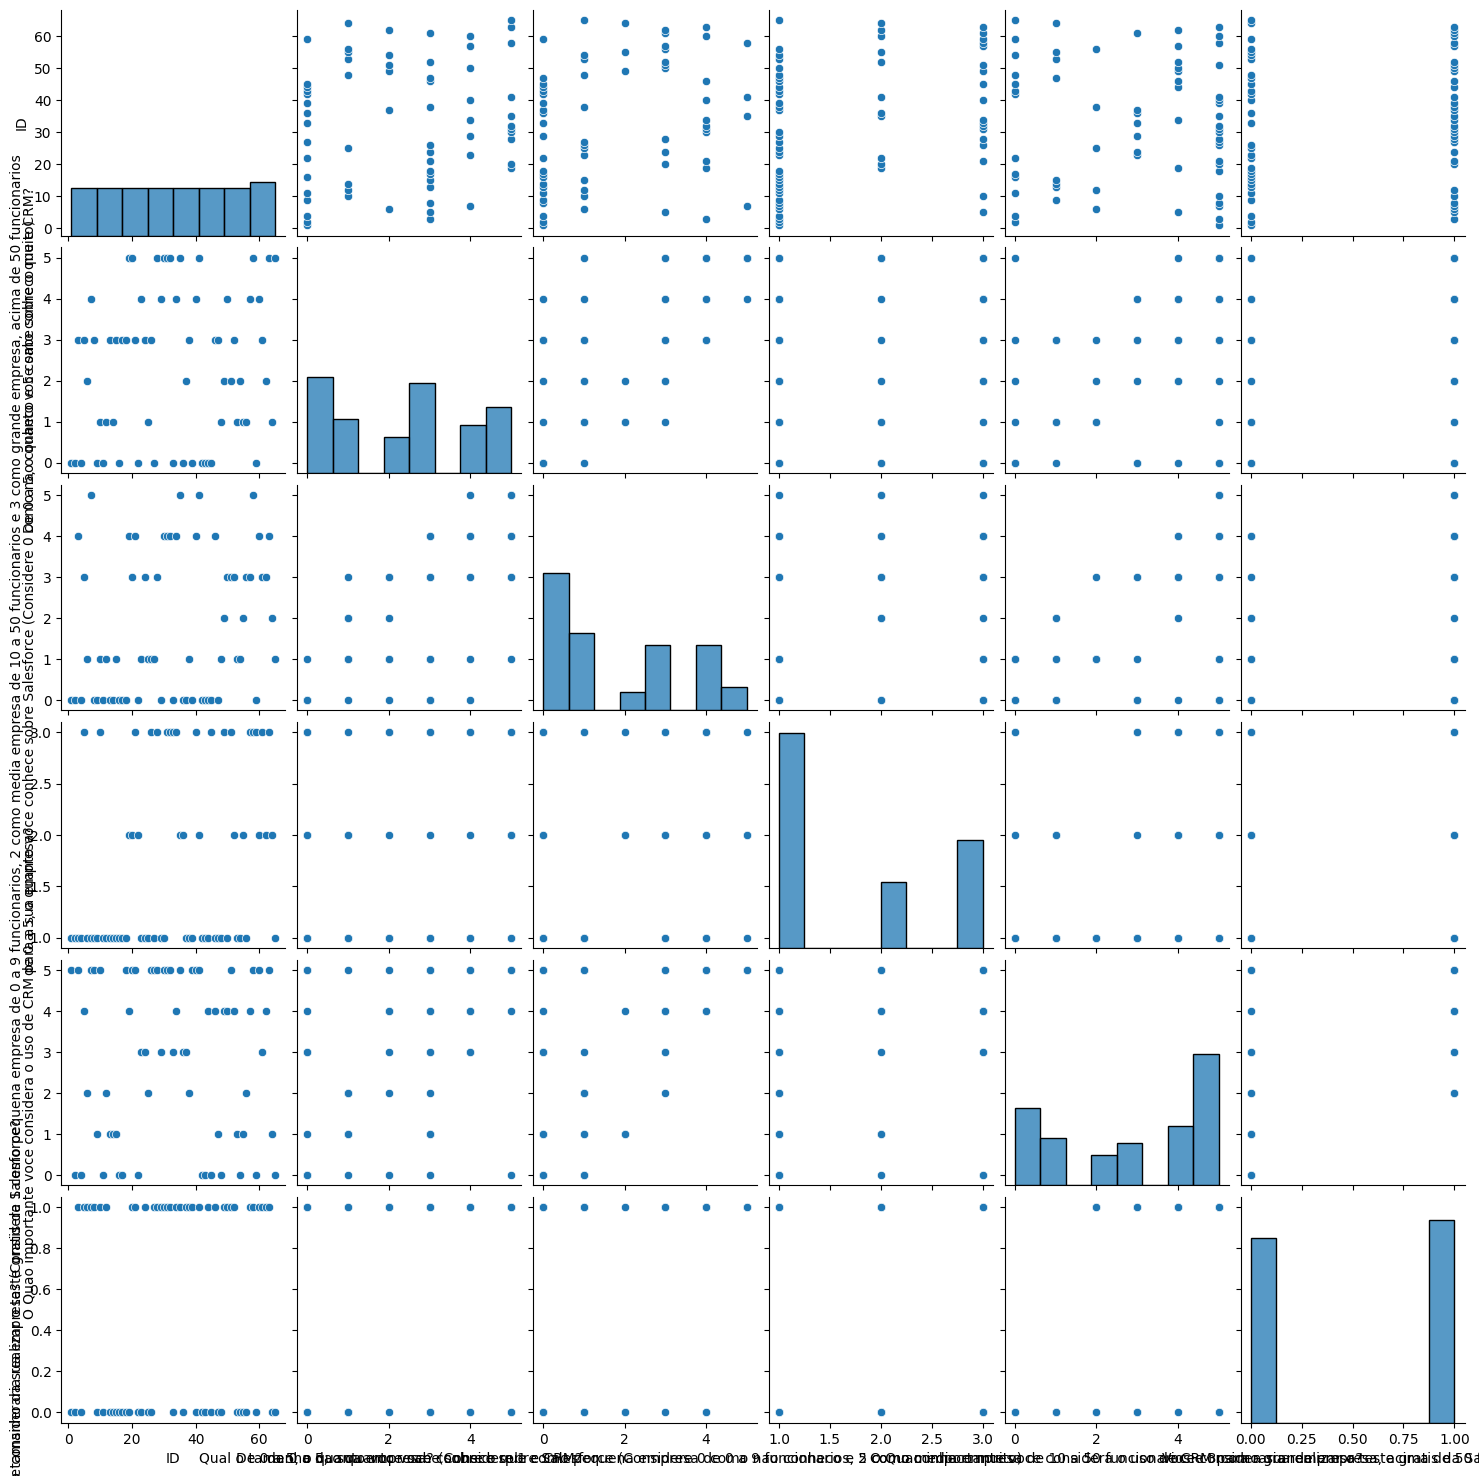

In [4]:
sns.pairplot(df)

Criação de novas variaveis para o aprendizado de maquina X e y.

A váriavel X recebe todas as colunas do nosso dataframe, com excessão da coluna 'Voce consideraria realizar o teste gratis da Salesforce?'. 

A variavel y recebe somente a coluna 'Voce consideraria realizar o teste gratis da Salesforce?'

Separando dessa forma, vamos conseguir treinar a variavel X para predizer os resultados da variavel y. 

In [5]:
X = df.drop(columns=['Voce consideraria realizar o teste gratis da Salesforce?'], axis=1)
y = df['Voce consideraria realizar o teste gratis da Salesforce?']




Agora, o código utiliza da biblioteca sklearn.model_selection para dividir o nosso conjunto de dados (X e y) em dois novos subconjuntos, um para treinamento e outro para teste. o parametro "test_size=0.20 informa que a proporção de dados para o teste serão de 20%. random_state funciona como o seed da nossa "aleatoriedade", dessa forma, todos que rodarem o codigo com random_state=42 terão o mesmo resultado.

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Com o uso da biblioteca sklearn.ensemble, importamos o algoritmo de classificação RandomForestClassifier, esse algoritmo é responsavel pelo aprendizado de maquina que cria arvores de decições diferentes para o treinamento do modelo.

Também importamos o accuracy_score, que mede a acuracia do nosso modelo.

Conseguimos chegar em uma acuracia de 92% em predizer quais usuarios tem mais probabilidade de realizar ou não o teste gratis.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ML = RandomForestClassifier(random_state=42)
ML.fit(X_train, y_train)
ML.score(X_test, y_test)*100

92.3076923076923

Por fim, salvamos o nosso modelo já treinado (ML) em um arquivo .pkl

In [12]:
import pickle

modelo = "ML_modelo.pkl"

with open('ML_modelo.pkl', 'wb') as file:
    pickle.dump(ML, file)